### building chatbot with multiple tools using langGraph 

#### Aim 

- create a chatbot with tool capabilities from arxiv , wikipedia search and some functions.
- 

In [6]:
import os 
from dotenv import load_dotenv

load_dotenv(dotenv_path="../.env")

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API")
os.environ["TAVILY_API_KEY"]= os.getenv("TAVILY_API_KEY")

In [11]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from rich import print

from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,AIMessage,AnyMessage 
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import START,END,StateGraph
from typing_extensions import TypedDict
from typing import Annotated 

from IPython.display import display , Image

#### calling tools 


In [ ]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2) ## you can add <doc_content_chars_max=500>
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

In [14]:
print(arxiv.invoke("attention is all you need"))

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time on the performance of
Llama-v2 models. We find that dropping dreeper attention layers only marginally
decreases performance but leads to the best speedups alongside dropping entire
layers. For example, removing 33\% of attention layers in a 13B Llama2 model
results in a 1.8\% drop in average performance over the OpenLLM benchmark. We
also observe that skipping layers except the latter layers reduces performances
for more layers skipped, except for skipping the attention layers.

Published: 2021-07-16
Title: All the attention you need: Global-local, spatial-channel attention for image retrieval
Authors: Chull Hwan Song, Hye Joo Han, Yannis Avrithis
Summary: We address representation learning for large-scale instance-level image
retrieval. Apart from backbone, training pipelines and loss functions, popular
approaches have focused on different spatial pooling and attention mechanisms,
which are at the core of learning a powerful global image representation. There
are different forms of attention according to the interaction of elements of
the feature tensor (local and global) and the dimensions where it is applied
(spatial and channel). Unfortunately, each study addresses only one or two
forms of attention and applies it to different problems like classification,
detection or retrieval.
  We present global-local attention module (GLAM), which is attached at the end
of a backbone network and incorporates all four forms of attention: local and
global, spatial and channel. We obtain a new feature tensor and, by spatial
pooling, we learn a powerful embedding for image retrieval. Focusing on global
descriptors, we provide empirical evidence of the interaction of all forms of
attention and improve the state of the art on standard benchmarks.

In [23]:
api_wrapper_wikipedia=WikipediaAPIWrapper(top_k_results=3,doc_content_chars_max=10000)

wikipedia=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)

In [ ]:
a=wikipedia.run("india",)
print(a)

Page: India
Summary: India, officially the Republic of India, is a country in South Asia.  It is the seventh-largest country by
area; the most populous country since 2023; and, since its independence in 1947, the world's most populous 
democracy. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the
southeast, it shares land borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh 
and Myanmar to the east. In the Indian Ocean, India is near Sri Lanka and the Maldives; its Andaman and Nicobar 
Islands share a maritime border with Myanmar, Thailand, and Indonesia.
Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago. Their long occupation,
predominantly in isolation as hunter-gatherers, has made the region highly diverse. Settled life emerged on the 
subcontinent in the western margins of the Indus river basin 9,000 years ago, evolving gradually into the Indus 
Valley Civilisation of the third millennium BCE. By 1200 BCE, an archaic form of Sanskrit, an Indo-European 
language, had diffused into India from the northwest. Its hymns recorded the early dawnings of Hinduism in India. 
India's pre-existing Dravidian languages were supplanted in the northern regions. By 400 BCE, caste had emerged 
within Hinduism, and Buddhism and Jainism had arisen, proclaiming social orders unlinked to heredity. Early 
political consolidations gave rise to the loose-knit Maurya and Gupta Empires. Widespread creativity suffused this 
era, but the status of women declined, and untouchability became an organised belief. In South India, the Middle 
kingdoms exported Dravidian language scripts and religious cultures to the kingdoms of Southeast Asia.
In the early medieval era, Christianity, Islam, Judaism, and Zoroastrianism became established on India's southern 
and western coasts. Muslim armies from Central Asia intermittently overran India's northern plains in the second 
millennium. The resulting Delhi Sultanate drew northern India into the cosmopolitan networks of medieval Islam. In 
south India, the Vijayanagara Empire created a long-lasting composite Hindu culture. In the Punjab, Sikhism 
emerged, rejecting institutionalised religion. The Mughal Empire ushered in two centuries of economic expansion and
relative peace, leaving a rich architectural legacy. Gradually expanding rule of the British East India Company 
turned India into a colonial economy but consolidated its sovereignty. British Crown rule began in 1858. The rights
promised to Indians were granted slowly, but technological changes were introduced, and modern ideas of education 
and the public life took root. A nationalist movement emerged in India, the first in the non-European British 
empire and an influence on other nationalist movements. Noted for nonviolent resistance after 1920, it became the 
primary factor in ending British rule. In 1947, the British Indian Empire was partitioned into two independent 
dominions, a Hindu-majority dominion of India and a Muslim-majority dominion of Pakistan. A large-scale loss of 
life and an unprecedented migration accompanied the partition.
India has been a federal republic since 1950, governed through a democratic parliamentary system. It is a 
pluralistic, multilingual and multi-ethnic society. India's population grew from 361 million in 1951 to over 1.4 
billion in 2023. During this time, its nominal per capita income increased from US$64 annually to US$2,601, and its
literacy rate from 16.6% to 74%. A comparatively destitute country in 1951, India has become a fast-growing major 
economy and a hub for information technology services, with an expanding middle class. Indian movies and music 
increasingly influence global culture. India has reduced its poverty rate, though at the cost of increasing 
economic inequality. It is a nuclear-weapon state that ranks high in military expenditure. It has disputes over 
Kashmir with

In [32]:
## tavilySearchtool -> 
# a search engine tool for ai agents , devlivering real time , accurate and factual results at speed 
from langchain_community.tools.tavily_search import TavilySearchResults

tavily= TavilySearchResults()

In [33]:
tavily.invoke("provide me the recent ai news for september 2025")

[{'title': 'Latest AI News and Technology Developments – September 2025',
  'url': 'http://rapidassure.com/breaking-latest-ai-news-and-technology-developments-september-2025/',
  'content': '### Breaking: Latest AI News and Technology Developments – September 2025\n\nThe artificial intelligence landscape continues to evolve at a breakneck pace, with significant developments reshaping how we interact with AI systems and their applications across industries. Here are the most important AI news stories and technological breakthroughs as of September 2025.\n\n## Apple’s Strategic AI Push: Siri Gets Major Intelligence Upgrade [...] The competitive landscape among AI models has intensified significantly. Claude Opus 4.1, from Anthropic, is widely regarded to be the superior model for sustained autonomous coding and agentic work, challenging OpenAI’s dominance in certain specialized applications. Meanwhile, Google continues to advance its large language model (LLM) family with the latest Gemi

In [35]:
# combine all the tools in the list to add in node 

tools=[arxiv,wikipedia,tavily]

In [4]:
llm=ChatGroq(model="openai/gpt-oss-120b")

In [36]:
llm_with_tools=llm.bind_tools(tools)

In [37]:
from pprint import pprint
print(llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News ")]))

AIMessage(
    content='',
    additional_kwargs={
        'reasoning_content': 'User asks: "What is the recent AI News". Likely wants recent AI news. Need to fetch 
recent news. Use tavily_search_results_json to search "recent AI news".',
        'tool_calls': [
            {
                'id': 'fc_e4e27371-843f-42c1-8056-117c46d5dfda',
                'function': {
                    'arguments': '{"query":"recent AI news 2024"}',
                    'name': 'tavily_search_results_json'
                },
                'type': 'function'
            }
        ]
    },
    response_metadata={
        'token_usage': {
            'completion_tokens': 74,
            'prompt_tokens': 292,
            'total_tokens': 366,
            'completion_time': 0.147464443,
            'prompt_time': 0.010638242,
            'queue_time': 0.054264378,
            'total_time': 0.158102685
        },
        'model_name': 'openai/gpt-oss-120b',
        'system_fingerprint': 'fp_ed9190d8b7',
        'service_tier': 'on_demand',
        'finish_reason': 'tool_calls',
        'logprobs': None
    },
    id='run--75ada7fa-905d-4acc-a548-20900a27f730-0',
    tool_calls=[
        {
            'name': 'tavily_search_results_json',
            'args': {'query': 'recent AI news 2024'},
            'id': 'fc_e4e27371-843f-42c1-8056-117c46d5dfda',
            'type': 'tool_call'
        }
    ],
    usage_metadata={'input_tokens': 292, 'output_tokens': 74, 'total_tokens': 366}
)

In [38]:
print(llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News ")]).tool_calls)

[
    {
        'name': 'tavily_search_results_json',
        'args': {'query': 'recent AI news 2024'},
        'id': 'fc_72315e41-4cf1-40fc-b0e2-fbde38dca822',
        'type': 'tool_call'
    }
]

### Let's build langGraph

In [3]:
class state(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [48]:
## creating llm node 

def llm_tool(state:state):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [49]:
builder=StateGraph(state)

builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))


builder.add_edge(START,"llm_tool")
# builder.add_edge("llm_tool","tools")
builder.add_conditional_edges(
    "llm_tool",tools_condition
)

builder.add_edge("tools","llm_tool")
builder.add_edge("llm_tool",END)

In [50]:
graph=builder.compile()

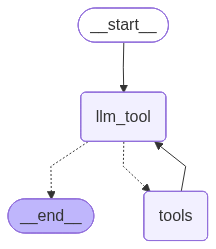

In [51]:
from IPython.display import display,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [52]:
message=graph.invoke({"messages":"give me links and short summary of top ai new of september 2025."})

In [59]:
from pprint import pprint
for i in message["messages"]:
    i.pretty_print()

================================ Human Message =================================

give me links and short summary of top ai new of september 2025.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_094ee11e-6033-437b-b0e7-0236b0c504eb)
 Call ID: fc_094ee11e-6033-437b-b0e7-0236b0c504eb
  Args:
    query: September 2025 AI news top headlines
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Latest AI News and AI Breakthroughs that Matter Most: 2025", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "### Apple Sued by Authors Over AI Book Training\n\nDate: September 5, 2025\n\nSummary: Apple faces a lawsuit from three prominent authors, including Michael Chabon, over allegedly using their books to train AI models without permission. The suit claims Apple's AI partner, OpenAI, used copyrighted works to power

In [66]:
message=graph.invoke({"messages":"give me hunter 350  bike prices in india after 22nd september 2025 ? , do web search and give detail answer. "})

In [67]:
for i in message["messages"]:
    i.pretty_print()

================================ Human Message =================================

give me hunter 350  bike prices in india after 22nd september 2025 ? , do web search and give detail answer. 
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_cd8aa2c8-703b-4edf-8756-f1b65fadf5af)
 Call ID: fc_cd8aa2c8-703b-4edf-8756-f1b65fadf5af
  Args:
    query: Hunter 350 bike price India September 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Royal Enfield Hunter 350 Price, Mileage, Weight, Images - BikeDekho", "url": "https://www.bikedekho.com/royal-enfield/hunter", "content": "|  |  |\n --- |\n| Digital Display Type | LCD Connectivity |\n| Brightness Control | Yes |\n| No. of Tripmeters | 2 |\n| Stand Alarm | Yes |\n| Gear Indicator | Yes |\n| Hazard Warning Indicator | Yes |\n| High Beam Indicator | Yes |\n| Malfunction Indicator | Yes |